In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## ラミナー継続時間平均分布

In [20]:
a = np.loadtxt("../average_durations/data/beta0.416156-0.416255_8num_t1e+080.01_window1000.txt")[2:-5,]
b = np.loadtxt("../average_durations/data/beta0.416101-0.416258_32num_t1e+080.01_window1000.txt")[25:,]
c = np.loadtxt("../average_durations/data/beta0.416159-0.416159_8num_t1e+09_dt0.01_window1000.txt")[3:]
d = np.loadtxt("../average_durations/data/beta0.416159-0.416159_30num_t1e+09_dt0.01_window1000.txt")[:]
# data = np.concatenate((c, d), axis=0)
data = d
#1列目でソート
data = data[data[:,0].argsort()]
critical = 0.41615
# data[:, 0] = np.log10(data[:, 0] - critical)
data[:, 1] = np.log10(data[:, 1])

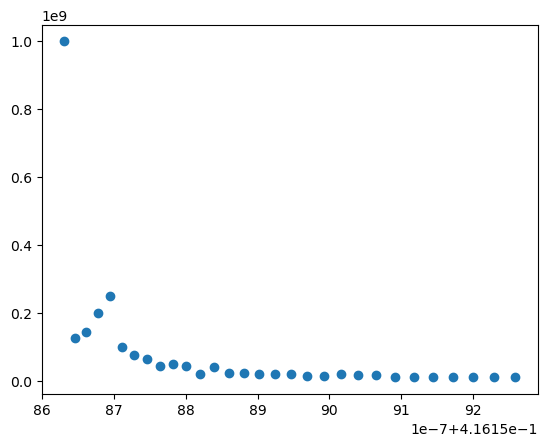

In [15]:
target = d
plt.scatter(target[:, 0], target[:, 1])

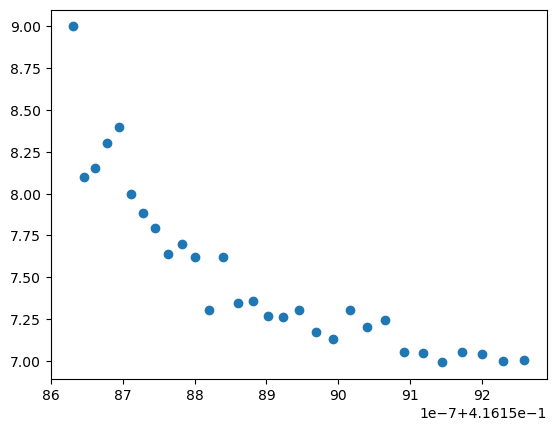

In [17]:
# dataをファイルに保存
np.savetxt("data.txt", data)
plt.plot(data[:, 0], data[:, 1], "o")

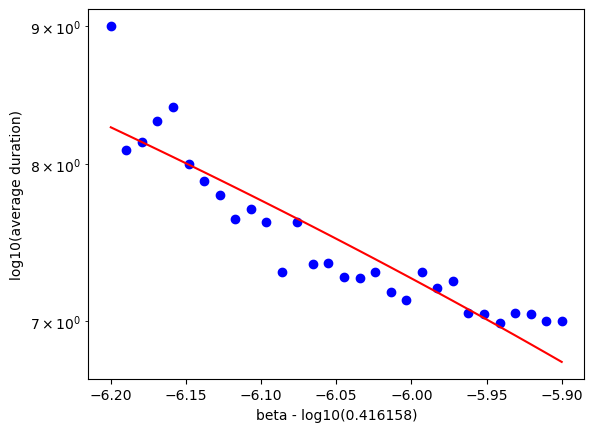

array([-22.62694612])

In [18]:
x = np.log10(data[:, 0].reshape(-1, 1) - critical)
# x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
#多項式回帰
poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(x)
lin_regressor = LinearRegression()
lin_regressor.fit(x_poly, y)
y_pred = lin_regressor.predict(x_poly)

#グラフ描画
plt.scatter(x, y, color="blue")
plt.plot(x, y_pred, color="red")
plt.xlabel(f"beta - log10({critical})")
plt.ylabel("log10(average duration)")
plt.yscale("log")
plt.show()

lin_regressor.intercept_


メモ(べきでうまくいった回帰式)
f(x) = a*log10(x - b) + c
fit f(x) "data.txt" u 1:2 via a,b,c

In [ ]:
0.41616
0.41658
0.4165

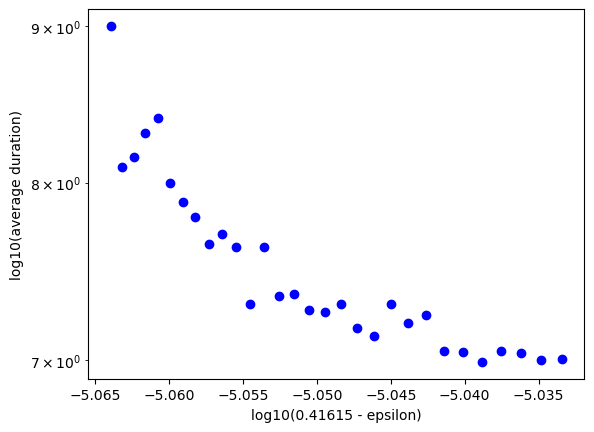

In [22]:
a = -3.52753
b = critical 
c = 3.47047
x_ = np.log10(data[:, 0] - b)
y_ = data[:, 1]
#グラフ描画
plt.scatter(x_, y_, color="blue")
# plt.plot(x_, a*x_ + c, color="red")
plt.xlabel(f"log10({critical} - epsilon)")
plt.ylabel("log10(average duration)")
plt.yscale("log")
plt.show()

In [7]:
x_

array([-0.55157263, -0.55157252, -0.55157232, -0.55157194, -0.55157119])